# Differential binding
Identify all locations where either CTCF binding is lost or CTCF binding is gained during differentiation. Write the result in BED format. This can be done quite easily using the program bedtools, which is useful for manipulating and overlapping BED files.

In [522]:
Binding_gained = open("CTCF_BindingGained.bed", "r")
Binding_gained

<_io.TextIOWrapper name='CTCF_BindingGained.bed' mode='r' encoding='UTF-8'>

In [523]:
Binding_lost = open("CTCF_BindingLost.bed", "r")
Binding_lost

<_io.TextIOWrapper name='CTCF_BindingLost.bed' mode='r' encoding='UTF-8'>

In [524]:
s = 0
for sites in Binding_gained:
    s += 1
    gained = (str("gained"), s)

In [525]:
gained

('gained', 663)

In [526]:
s = 0
for sites in Binding_lost:
    s += 1
    lost = (str("lost"), s)

In [527]:
lost

('lost', 577)

In [528]:
binding = [gained, lost]
binding

[('gained', 663), ('lost', 577)]

In [529]:
import pandas as pd
from pandas import DataFrame

In [530]:
binding_df = pd.DataFrame(binding)
binding_df

,0,1
0,gained,663
1,lost,577


In [531]:
import matplotlib.pyplot as plt 
import numpy as np

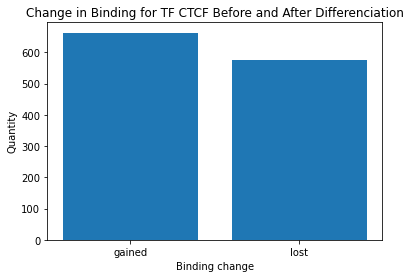

In [532]:
fig, ax = plt.subplots()
ax.bar(binding_df.iloc[:,0], binding_df.iloc[:,1]) 
ax.set_title('Change in Binding for TF CTCF Before and After Differenciation')
ax.set_xlabel('Binding change')
ax.set_ylabel('Quantity')
plt.show()

# Feature overlapping
Count how many of the CTCF binding sites in G1E and ER4 overlap with each feature.

In [533]:
G1E_exon = open("G1E_Exon_Overlap.bed", "r")

In [534]:
G1E_intron = open("G1E_Intron_Overlap.bed", "r")

In [535]:
ER4_exon = open("ER4_Exon_Overlap.bed")

In [536]:
ER4_intron = open("ER4_Intron_Overlap.bed")

In [537]:
G1E_promoter = open("G1E_Promoter_Overlap.bed", "r")

In [538]:
ER4_promoter= open("ER4_Promoter_Overlap.bed", "r")

In [539]:
for exon in G1E_exon:
    s += 1
    G1E_exon = (str("Exon"), s)

In [540]:
for intron in G1E_intron:
    s += 1
    G1E_intron = (str("Intron"), s)

In [541]:
for exon in ER4_exon:
    s += 1
    ER4_exon = (str("Exon"), s)

In [542]:
for intron in ER4_intron:
    s += 1
    ER4_intron = (str("Intron"), s)

In [543]:
for promoter in G1E_promoter:
    s += 1
    G1E_promoter = (str("Promoter"), s)

In [544]:
for promoter in ER4_promoter:
    s += 1
    ER4_promoter = (str("Promoter"), s)

In [545]:
G1Eoverlaps = [G1E_exon, G1E_intron, G1E_promoter]

In [546]:
G1Eoverlaps_df = pd.DataFrame(G1Eoverlaps)
G1Eoverlaps_df

,0,1
0,Exon,609
1,Intron,884
2,Promoter,1277


In [547]:
ER4overlaps = [ER4_exon, ER4_intron, ER4_promoter]

In [548]:
ER4overlaps_df = pd.DataFrame(ER4overlaps)
ER4overlaps_df

,0,1
0,Exon,936
1,Intron,1234
2,Promoter,1332


In [549]:
overlaps_df.loc[1:6:2,0]

1    ER4
3    ER4
5    ER4
Name: 0, dtype: object

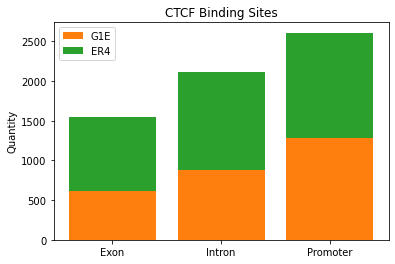

In [558]:
fig, ax = plt.subplots()
ax.bar(G1Eoverlaps_df.loc[:,0], G1Eoverlaps_df.loc[:,1], color='C1')
ax.bar(ER4overlaps_df.loc[:,0], ER4overlaps_df.loc[:,1], bottom = G1Eoverlaps_df.loc[:,1], color='C2')
ax.set_ylabel('Quantity')
ax.set_title('CTCF Binding Sites')
ax.legend(labels=['G1E', 'ER4'])
plt.show()

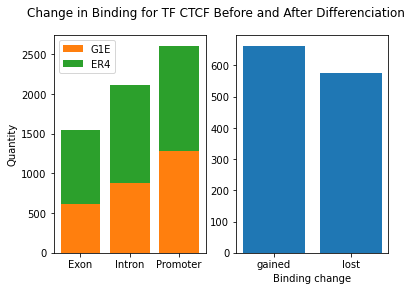

In [561]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Change in Binding for TF CTCF Before and After Differenciation')
ax1.bar(G1Eoverlaps_df.loc[:,0], G1Eoverlaps_df.loc[:,1], color='C1')
ax1.bar(ER4overlaps_df.loc[:,0], ER4overlaps_df.loc[:,1], bottom = G1Eoverlaps_df.loc[:,1], color='C2')
ax1.set_ylabel('Quantity')
ax1.legend(labels=['G1E', 'ER4'])
ax2.bar(binding_df.iloc[:,0], binding_df.iloc[:,1]) 
ax2.set_xlabel('Binding change')
plt.show()

In [562]:
fig.savefig('FinalPlot_Part1.png')